# New York City Taxi Trip Duration

## Import

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [14]:
train=pd.read_csv("C:/nyctaxitripduration/train/train.csv")
test=pd.read_csv("C:/nyctaxitripduration/test/test.csv")


## Data explore 

In [12]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null object
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 no

In [16]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [25]:
train.dtypes


id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

## Outliers


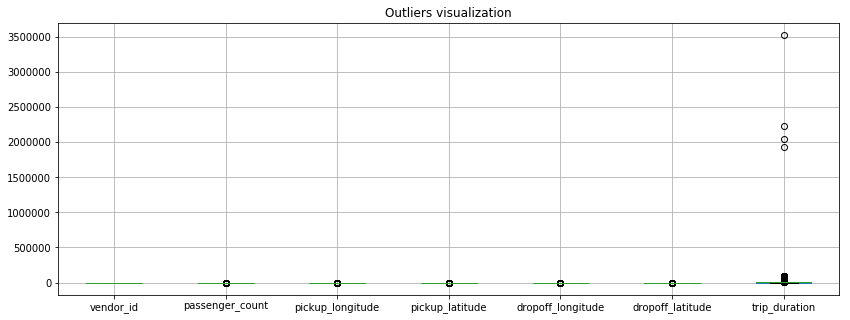

In [28]:
plt.subplots(figsize=(14,5))
plt.title("Outliers visualization")
train.boxplot();

### Comme les deux colonnes ne sont pas de type date on va les convertir pour pouvoir les exploiter

pickup_datetime        object

dropoff_datetime       object

In [31]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

### Un trajet est considéré comme etant un trajet il faut avoir un minimum d'un passager

In [32]:
train = train[train['passenger_count']> 0]

In [45]:
x_train = train[["vendor_id", "passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude","dropoff_latitude"]]

In [36]:
y=train['trip_duration']
y.describe()

count    1.458584e+06
mean     9.594611e+02
std      5.237064e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

### On va importer les bibliothèques pour faire le random forest

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

C:\Users\youne\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1166867, 6), (1166867,), (291717, 6), (291717,))

In [42]:
rand = RandomForestRegressor()

In [43]:
rand.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Validation

In [46]:
x_test = test[["vendor_id", "passenger_count","pickup_longitude", "pickup_latitude","dropoff_longitude","dropoff_latitude"]]
prediction = rand.predict(x_test)
prediction

array([  752.1,   557.1,   543.2, ...,  1539.2, 10245.7,  1574.8])

### Predections

In [47]:
sub = pd.read_csv("C:/nyctaxitripduration/sub/sample_submission.csv")
sub.head()

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959


In [48]:
submission = pd.DataFrame({'id': test.id, 'trip_duration': np.exp(prediction)})
submission.head()

,id,trip_duration
0,id3004672,inf
1,id3505355,8.819742e+241
2,id1217141,8.105178e+235
3,id2150126,inf
4,id1598245,7.864041e+208


In [49]:
submission.to_csv('submission.csv', index=False)